In [57]:
import numpy as np
import pandas as pd
import seaborn as sea 
import matplotlib.pyplot as plt

## Balancete Anual

In [58]:
bca = pd.read_csv('/home/joao/Projetos/trabalho_fasam/data_viz/data/geral/bca.csv')


bca = bca.rename(index = str, columns={"Year": "Ano", "Value":"Valor (Bilhões de Reais)"})

bca['Ano'] = bca['Ano'].apply(lambda x: x[0:4])



In [59]:
def periods(row):
    if row['Ano'] < '2003':
        return 'FHC'
    if row['Ano'] >= '2003' and row['Ano'] < '2011':
        return 'Lula'
    if row['Ano'] >= '2011':
        return "Dilma"

In [60]:
bca['Periodos'] = bca.apply(lambda row: periods(row), axis = 1)

In [106]:
bca = bca.apply(pd.to_numeric, errors = 'ignore')

bca

,Ano,Valor (Bilhões de Reais),Periodos
0,1995,-18.384,FHC
1,1996,-23.502,FHC
2,1997,-30.453,FHC
3,1998,-33.416,FHC
4,1999,-25.334,FHC
5,2000,-24.224,FHC
6,2001,-23.215,FHC
7,2002,-7.637,FHC
8,2003,4.178,Lula
9,2004,11.679,Lula


In [91]:
tips = sea.load_dataset('tips')

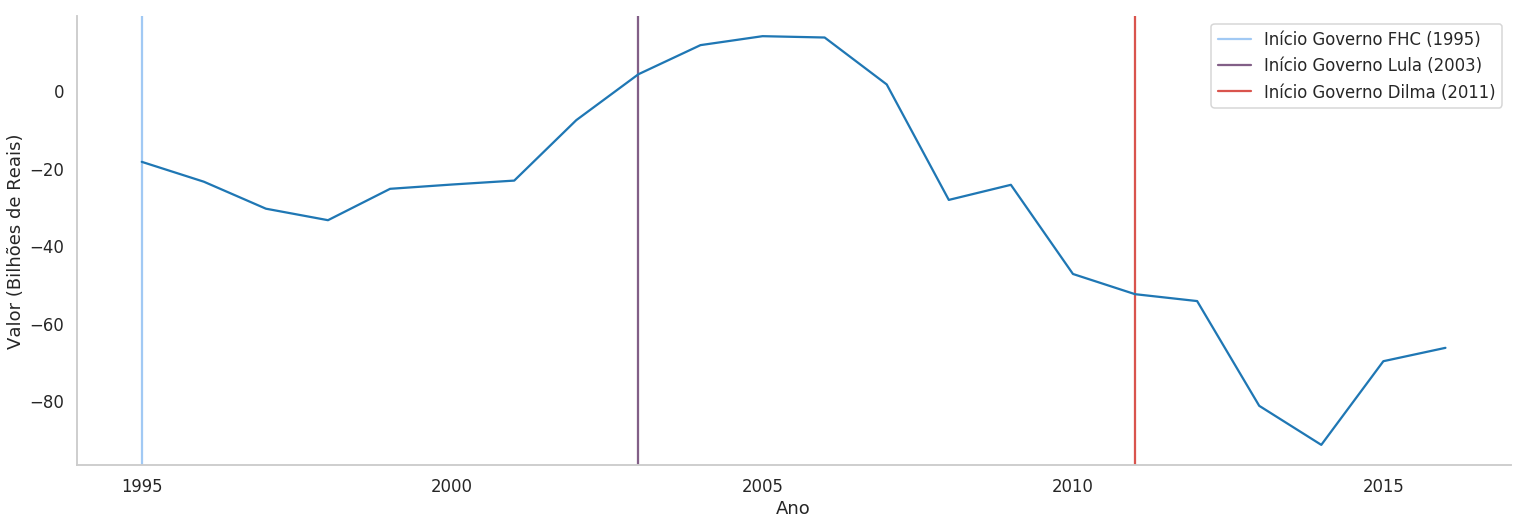

In [172]:
plt.close()
sea.set_style("whitegrid", {'axes.grid' : False})
clrs = ['red' if (ano >= 2003) else 'blue' for ano in bca['Ano']]
fig, ax = plt.subplots()
sea.set_context("talk")

fig.set_size_inches(25.7, 8.27)
plt.axvline(x=1995, color='B', label='Início Governo FHC (1995)')
plt.axvline(x=2003, color=sea.xkcd_rgb["dusty purple"], label='Início Governo Lula (2003)')
plt.axvline(x=2011, color= sea.xkcd_rgb["pale red"], label = 'Início Governo Dilma (2011)')
sea.lineplot(x='Ano', y ='Valor (Bilhões de Reais)', palette = clrs, data = bca)


sea.despine()

## Gastos x Receita

In [19]:
total = pd.read_csv('/home/joao/Projetos/trabalho_fasam/data_viz/data/geral/ggr_ggx_ggxwdg.csv')


total = total.rename(index = str, columns={"Year": "Ano", "Value":"Valor (Bilhões de Reais)"})

total['Ano'] = total['Ano'].apply(lambda x: x[0:4])

total['Periodos'] = total.apply(lambda row: periods(row), axis = 1)

total

,Ano,Receita,Gastos,Divida,Periodos
0,2000,373.664,413.470,786.135,FHC
1,2001,435.015,476.748,921.736,FHC
2,2002,513.615,579.415,1173.131,FHC
3,2003,615.364,704.306,1268.243,Lula
4,2004,692.324,748.630,1371.930,Lula
5,2005,786.874,863.682,1488.699,Lula
6,2006,858.668,944.677,1586.507,Lula
7,2007,949.199,1023.659,1733.983,Lula
8,2008,1115.843,1163.527,1923.972,Lula
9,2009,1130.527,1236.769,2164.607,Lula


In [29]:
total = total.apply(pd.to_numeric, errors = 'ignore')

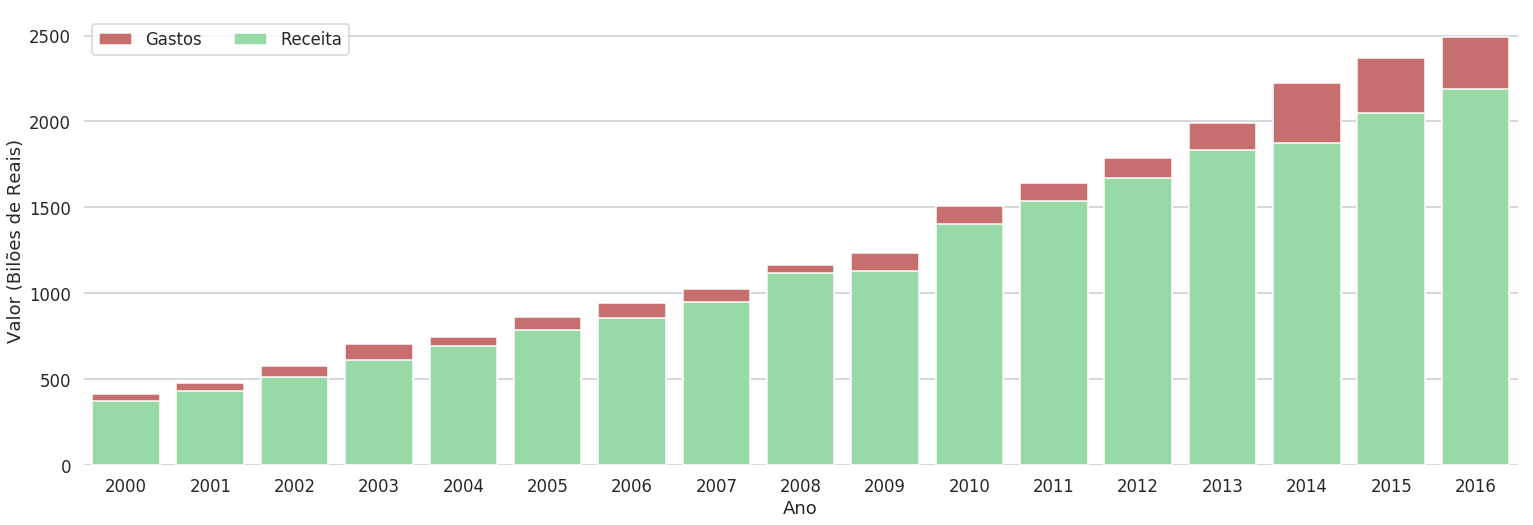

In [174]:
plt.close()
#ggr = sea.load_dataset('oi')
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)

sea.set_context("talk")


sea.set_color_codes("muted")
sea.barplot(x="Ano", y="Gastos", data=total,
            label="Gastos", color="r")

sea.set_color_codes("pastel")
sea.barplot(x="Ano", y="Receita", data=total,
            label="Receita", color="g")


ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="Valor (Bilhões de Reais)",
       xlabel="Ano")
sea.despine(left=True, bottom=True)
sea.set_style("whitegrid")


## Dívida Bruta

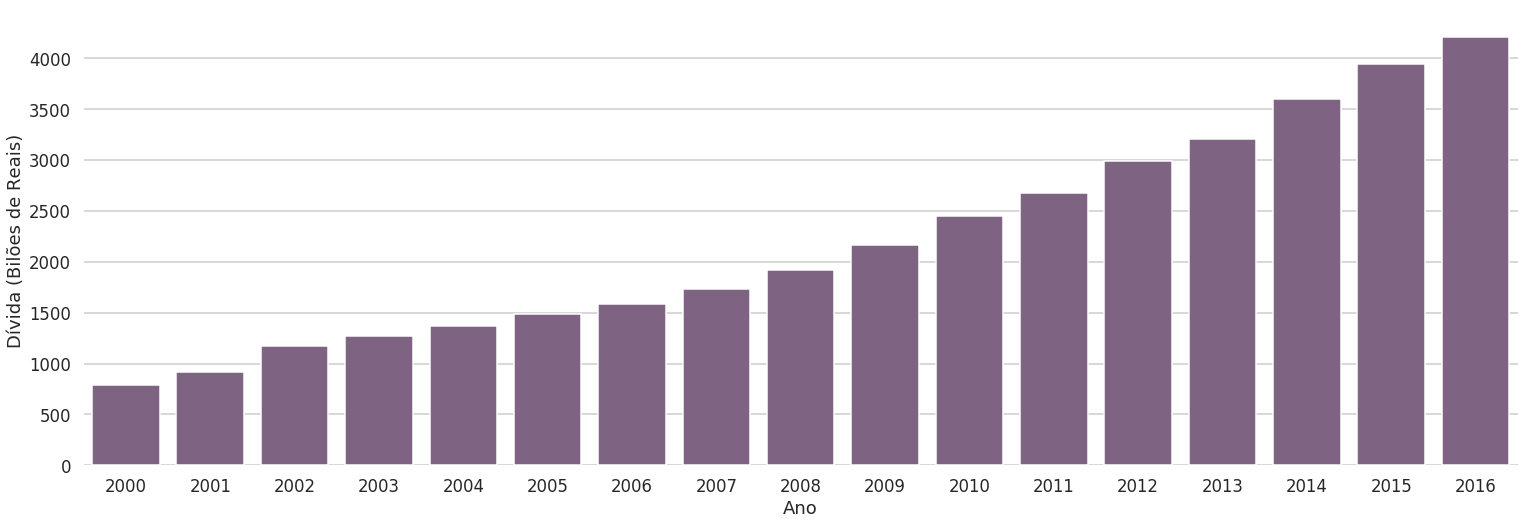

In [314]:
plt.close()
#ggr = sea.load_dataset('oi')
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)

sea.set_context("talk")

sea.set_color_codes("pastel")
sea.barplot(x="Ano", y="Divida", data=total,
            color=sea.xkcd_rgb["dusty purple"])



ax.set(ylabel="Dívida (Bilões de Reais)",
       xlabel="Ano")
sea.despine(left=True, bottom=True)
sea.set_style("whitegrid")


## Taxa de Desemprego

In [184]:
lur = pd.read_csv('/home/joao/Projetos/trabalho_fasam/data_viz/data/geral/lur.csv')



lur = lur.rename(index = str, columns={"Year": "Ano", "Value":"Porcentagem da Força de Trabalho"})

lur['Ano'] = lur['Ano'].apply(lambda x: x[0:4])

lur = lur.apply(pd.to_numeric, errors = 'ignore')

lur

,Ano,Porcentagem da Força de Trabalho
0,1995,4.650
1,1996,5.433
2,1997,5.684
3,1998,7.597
4,1999,7.600
5,2000,7.100
6,2001,11.265
7,2002,11.683
8,2003,12.317
9,2004,11.483


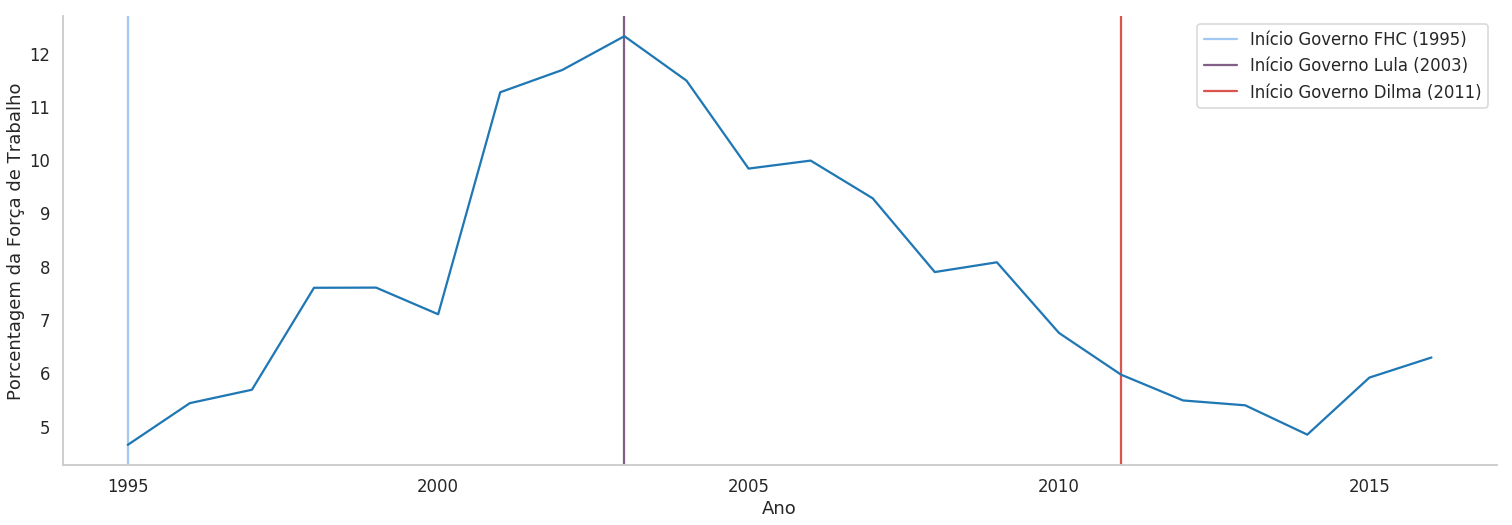

In [185]:
plt.close()
fig2, ax2 = plt.subplots()
sea.set_context("talk")
fig2.set_size_inches(25.7, 8.27)
plt.axvline(x=1995, color='B', label='Início Governo FHC (1995)')
plt.axvline(x=2003, color=sea.xkcd_rgb["dusty purple"], label='Início Governo Lula (2003)')
plt.axvline(x=2011, color= sea.xkcd_rgb["pale red"], label = 'Início Governo Dilma (2011)')
sea.lineplot(x='Ano', y ='Porcentagem da Força de Trabalho', palette = clrs, data = lur)
sea.despine()
sea.set_style("whitegrid", {'axes.grid' : False})


## PIB - NGDP

In [221]:
pib = pd.read_csv('/home/joao/Projetos/trabalho_fasam/data_viz/data/geral/ngdp.csv')



pib = pib.rename(index = str, columns={"Year": "Ano", "PIB":"Valor(Bilhões de Reais)"})

pib['Ano'] = pib['Ano'].apply(lambda x: x[0:4])

pib = pib.apply(pd.to_numeric, errors = 'ignore')

pib

,Ano,Valor(Bilhões de Reais)
0,1995,720.985
1,1996,857.857
2,1997,955.464
3,1998,1005.985
4,1999,1092.277
5,2000,1202.377
6,2001,1316.319
7,2002,1491.183
8,2003,1720.069
9,2004,1958.705


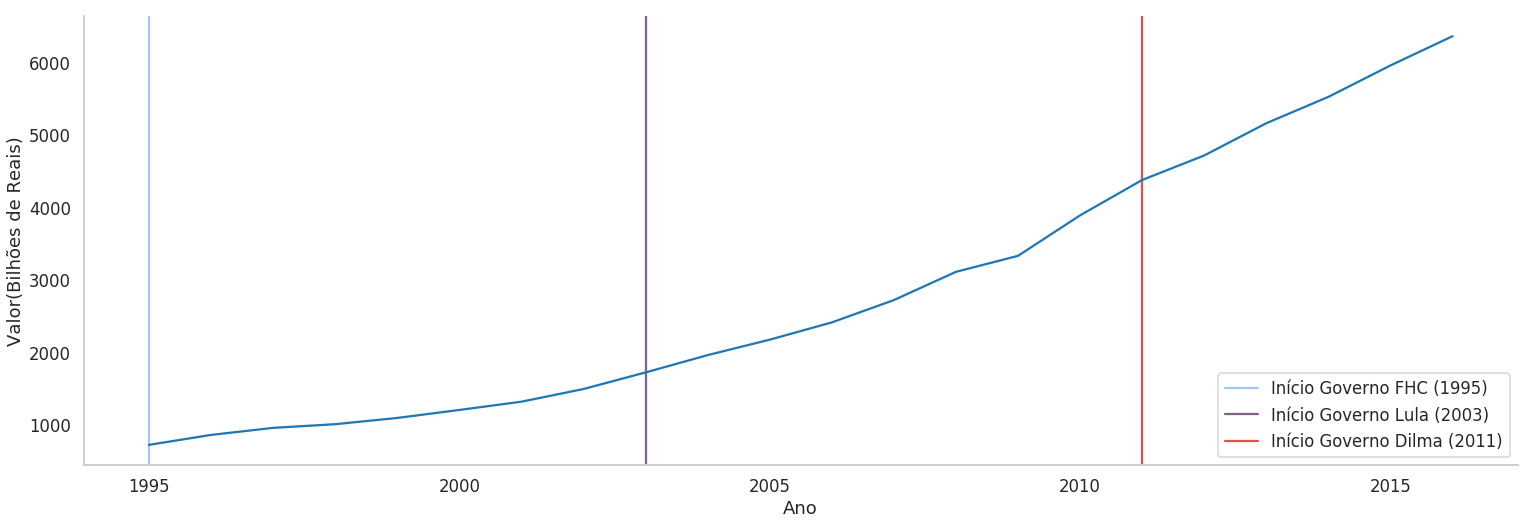

In [222]:
plt.close()
fig2, ax2 = plt.subplots()
sea.set_context("talk")
fig2.set_size_inches(25.7, 8.27)
plt.axvline(x=1995, color='B', label='Início Governo FHC (1995)')
plt.axvline(x=2003, color=sea.xkcd_rgb["dusty purple"], label='Início Governo Lula (2003)')
plt.axvline(x=2011, color= sea.xkcd_rgb["pale red"], label = 'Início Governo Dilma (2011)')
sea.lineplot(x='Ano', y ='Valor(Bilhões de Reais)', markers=True, data = pib)
sea.despine()
sea.set_style("whitegrid", {'axes.grid' : False})

In [237]:
def calcula_total(ano_inicial, ano_final):
    inicial = pib[pib['Ano'] == ano_inicial]['Valor(Bilhões de Reais)'].values
    final= pib[pib['Ano'] == ano_final]['Valor(Bilhões de Reais)'].values
    oi = final - inicial
    return oi


In [238]:
fhc = calcula_total(1995, 2003)

lula = calcula_total(2003, 2011)

dilma = calcula_total(2011,2016)

In [266]:
pib_total = pd.DataFrame({'Valor':[fhc[0],lula[0],dilma[0]], 'Presidente':['FHC', 'Lula', 'Dilma']})

In [267]:
pib_total

,Presidente,Valor
0,FHC,999.084
1,Lula,2654.696
2,Dilma,1983.511


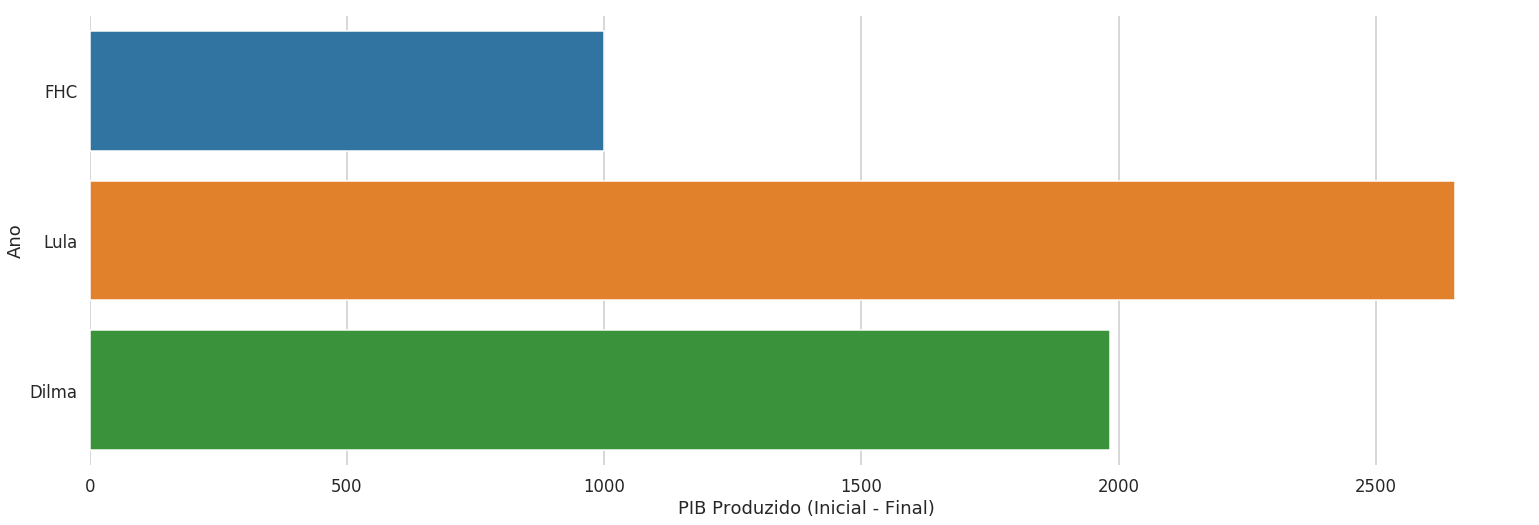

In [311]:
plt.close()
#ggr = sea.load_dataset('oi')
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)

sea.set_context("talk")

sea.set_color_codes("pastel")
sea.barplot(x="Valor", y="Presidente", data=pib_total)



#ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel= "Ano",
       xlabel="PIB Produzido (Inicial - Final)")
sea.despine(left=True, bottom=True)
sea.set_style("whitegrid")

## Total de Investimentos (NID_NGDP)

In [288]:
nid = pd.read_csv('/home/joao/Projetos/trabalho_fasam/data_viz/data/geral/nid_ngdp.csv')



nid = nid.rename(index = str, columns={"Year": "Ano", "Value":"Valor(Porcentagem do PIB)"})

nid['Periodos'] = nid.apply(lambda row: periods(row), axis = 1)


nid['Ano'] = nid['Ano'].apply(lambda x: x[0:4])

nid = nid.apply(pd.to_numeric, errors = 'ignore')


nid

,Ano,Valor(Porcentagem do PIB),Periodos
0,1995,19.850,FHC
1,1996,17.564,FHC
2,1997,18.052,FHC
3,1998,18.463,FHC
4,1999,17.735,FHC
5,2000,19.119,FHC
6,2001,18.870,FHC
7,2002,17.552,FHC
8,2003,17.057,Lula
9,2004,18.039,Lula


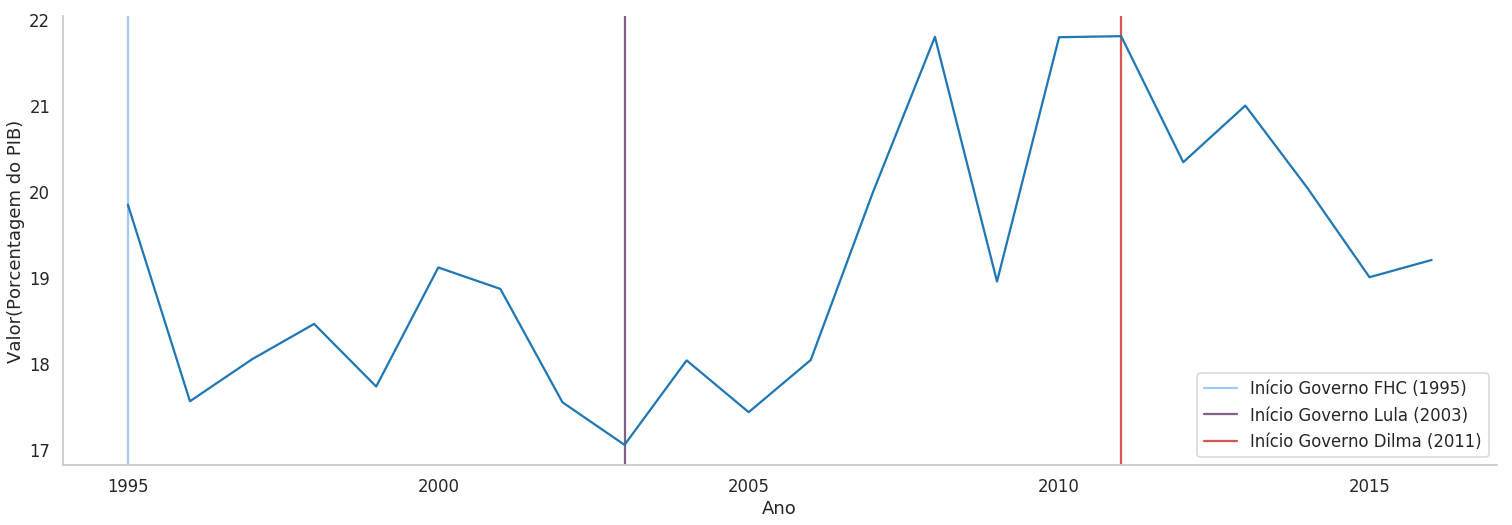

In [283]:
plt.close()
fig2, ax2 = plt.subplots()
sea.set_context("talk")
fig2.set_size_inches(25.7, 8.27)
plt.axvline(x=1995, color='B', label='Início Governo FHC (1995)')
plt.axvline(x=2003, color=sea.xkcd_rgb["dusty purple"], label='Início Governo Lula (2003)')
plt.axvline(x=2011, color= sea.xkcd_rgb["pale red"], label = 'Início Governo Dilma (2011)')
sea.lineplot(x='Ano', y ='Valor(Porcentagem do PIB)', markers=True, data = nid)
sea.despine()
sea.set_style("whitegrid", {'axes.grid' : False})

In [307]:
oi = nid.groupby(nid['Periodos'], axis =0).sum()

oi.reset_index(level=0, inplace=True)

oi

,Periodos,Ano,Valor(Porcentagem do PIB)
0,Dilma,12081,121.407
1,FHC,15988,147.205
2,Lula,16052,153.120


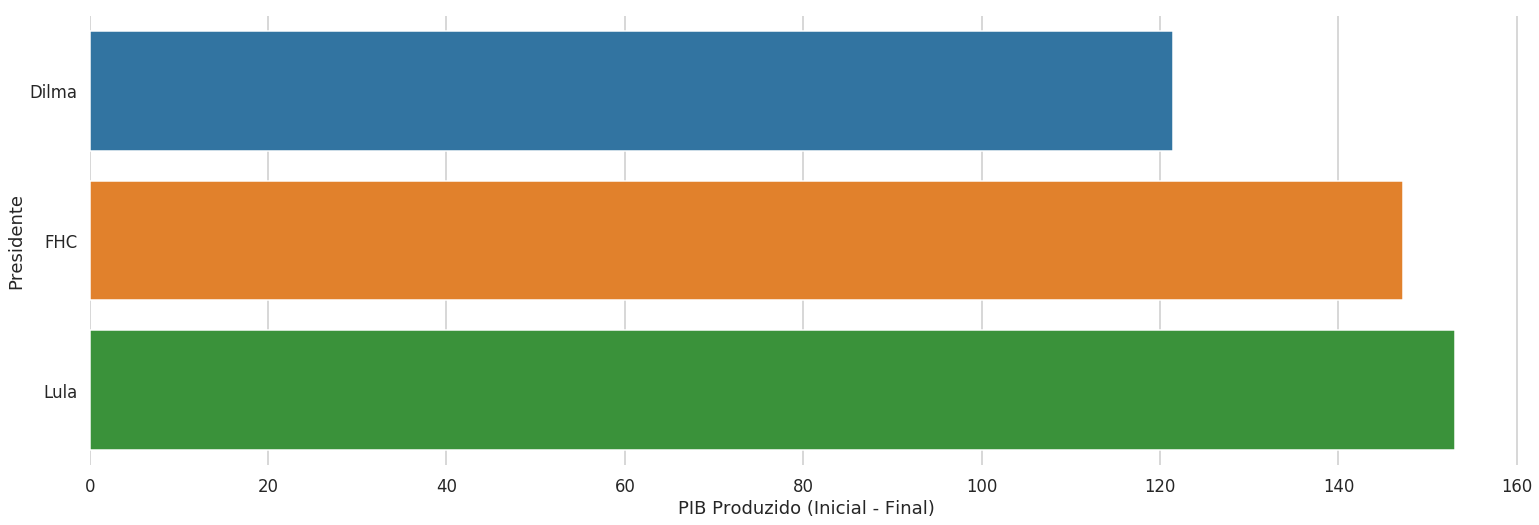

In [313]:
plt.close()
#ggr = sea.load_dataset('oi')
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)

sea.set_context("talk")

sea.set_color_codes("pastel")
sea.barplot(x="Valor(Porcentagem do PIB)", y="Periodos", data=oi)



#ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel= "Presidente",
       xlabel="PIB Produzido (Inicial - Final)")
sea.despine(left=True, bottom=True)
sea.set_style("whitegrid")